# Importing



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 2D plots(bar graphs..)
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # supplies all the algo required for ML
from sklearn.svm import SVC # used for linear and non-linear classification
# Support Vector Machines (SVMs) are a type of ML algorithm particularly good at classification (deciding which category something belongs to, like "cat" or "dog") and regression (predicting a number, like house price).
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix  # Metrics -  evaluates how well our Machine Learning models are performing, A confusion_matrix is a table that helps you visualize the performance of a classification model.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# train_test_split takes your entire dataset and splits it into two (or more) parts:
# Training Set: This is the larger portion of your data that your ML model will "learn" from. It's like the textbook your student studies.
# Test Set: This is the smaller, completely separate portion of your data that the model has never seen before. You use this set to evaluate how well your trained model performs on new data. It's like the exam your student takes.
%matplotlib inline


# Working with data


In [ ]:
df = pd.read_csv('bankloans.csv')
print(df)

      age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0      41   3      17       12     176      9.3  11.359392  5.008608      1.0
1      27   1      10        6      31     17.3   1.362202  4.000798      0.0
2      40   1      15       14      55      5.5   0.856075  2.168925      0.0
3      41   1      15       14     120      2.9   2.658720  0.821280      0.0
4      24   2       2        0      28     17.3   1.787436  3.056564      1.0
...   ...  ..     ...      ...     ...      ...        ...       ...      ...
1145   34   1      12       15      32      2.7   0.239328  0.624672      NaN
1146   32   2      12       11     116      5.7   4.026708  2.585292      NaN
1147   48   1      13       11      38     10.8   0.722304  3.381696      NaN
1148   35   2       1       11      24      7.8   0.417456  1.454544      NaN
1149   37   1      20       13      41     12.9   0.899130  4.389870      NaN

[1150 rows x 9 columns]


In [ ]:
df.head()

# head() - shows the top 5 rows of your DataFrame
# df.head(10) - gives top 10 rows

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df.isnull().sum()

# isnull() - Check for missing values in each cell, returning True/False
# sum() - Count the number of True (missing) values for each column

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


There are 450 default values which is not required.

In [ ]:
df.value_counts()

#For each unique value in a specific column, it counts how many times that value appears.
# It then presents these counts in descending order (from the most frequent value to the least frequent).

# For example ['Red', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Black', 'Blue']
# Red: 3
# Blue: 3
# Green: 1
# Black: 1

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
23   1   7       3        22      14.4     0.849024  2.318976  0.0        1
     2   0       1        17      27.7     2.043706  2.665294  1.0        1
                          42      3.9      1.018836  0.619164  1.0        1
                 2        21      11.4     0.775656  1.618344  1.0        1
                 4        21      8.7      0.454923  1.372077  0.0        1
Name: count, Length: 700, dtype: int64

Here there are 700 rows and 450 of then are default values which is not required. We need to clean the dataset by removing the default values.


In [ ]:
df = df.dropna()

# dropna() looks for any missing value in a row. If even one cell in a row is NaN (or empty), the entire row is targeted for removal.
#  df.dropna() creates a new DataFrame that contains only the rows that don't have any missing values.

df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


# Visualizing the data

<Axes: xlabel='age', ylabel='income'>

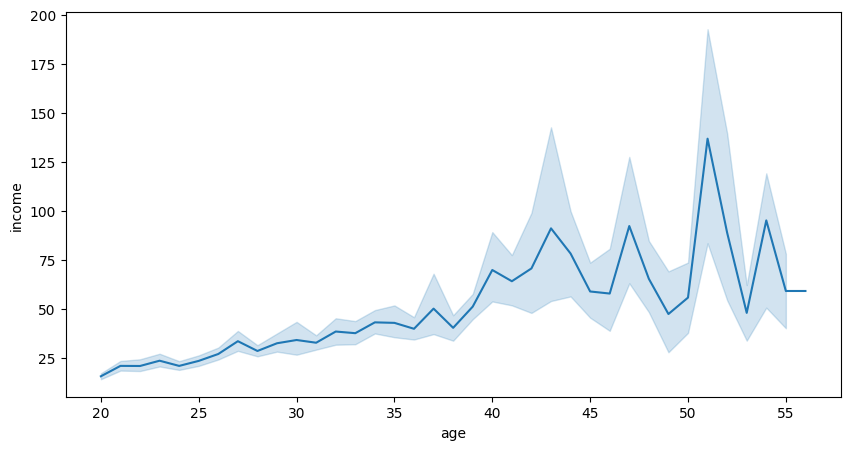

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = 'age', y = 'income', data = df, ax = ax)

In above graph, it shows that as age increases, income also increases

<Axes: xlabel='age', ylabel='debtinc'>

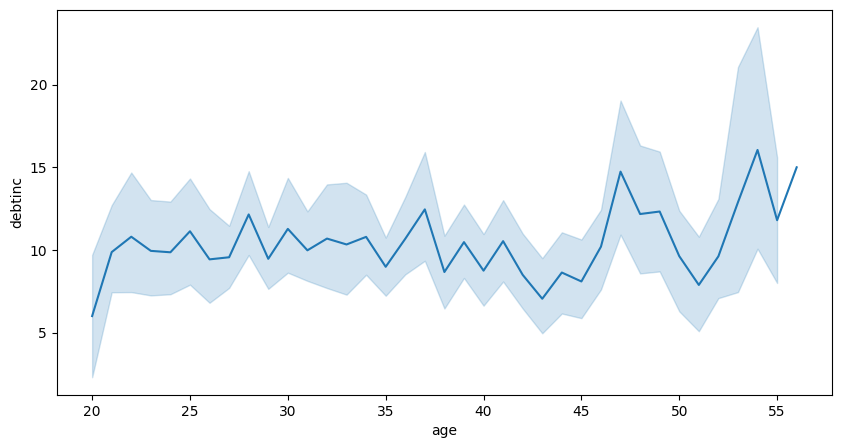

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = 'age', y = 'debtinc', data = df, ax = ax)

In [ ]:
df['default'].value_counts()

,count
default,
0.0,517
1.0,183


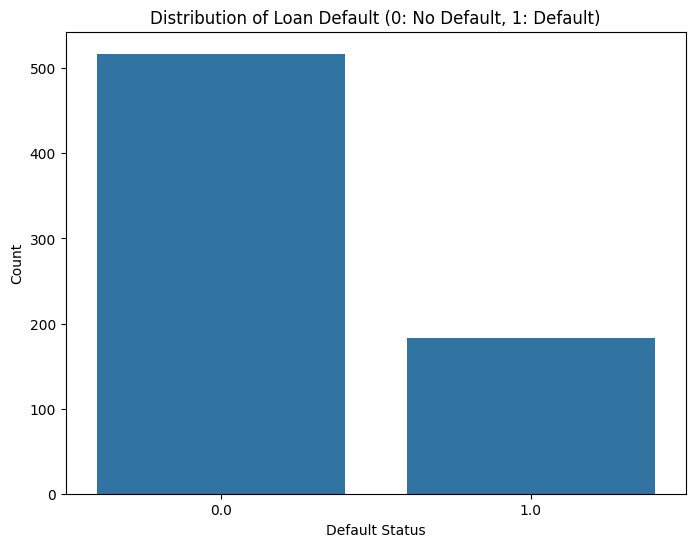

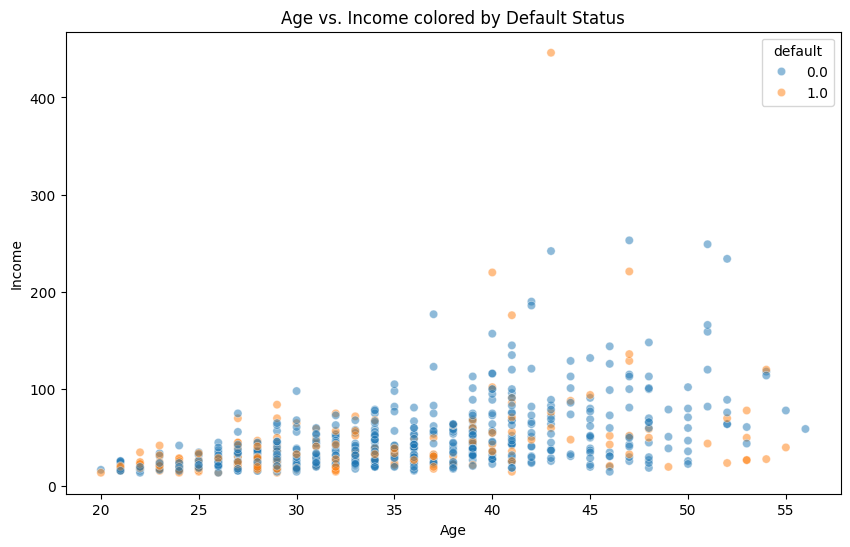

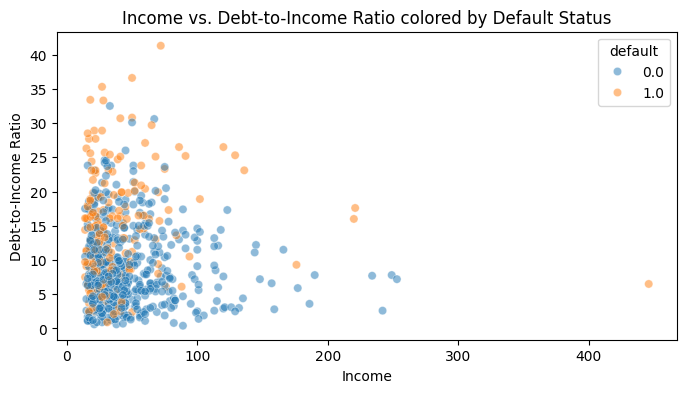

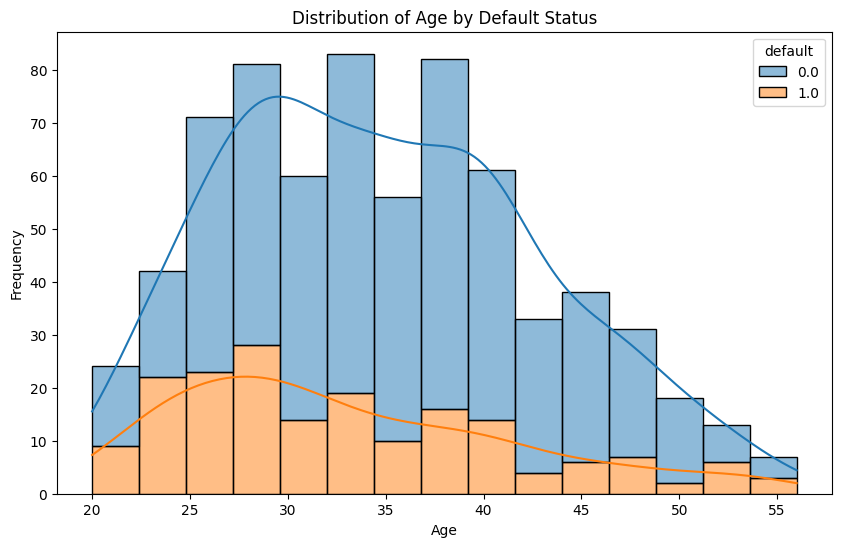

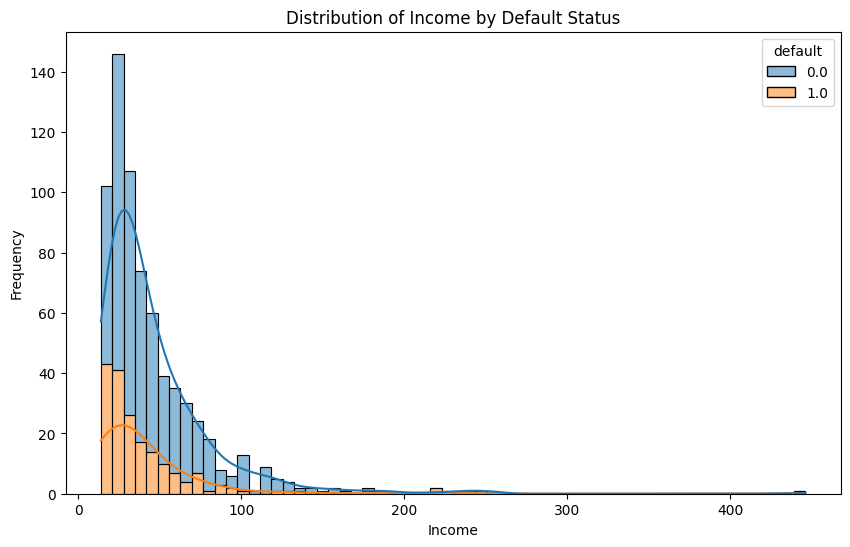

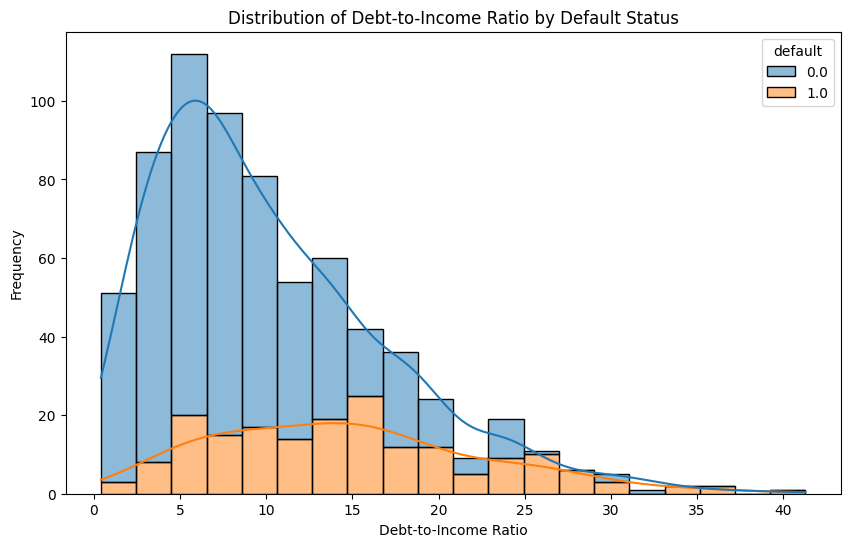

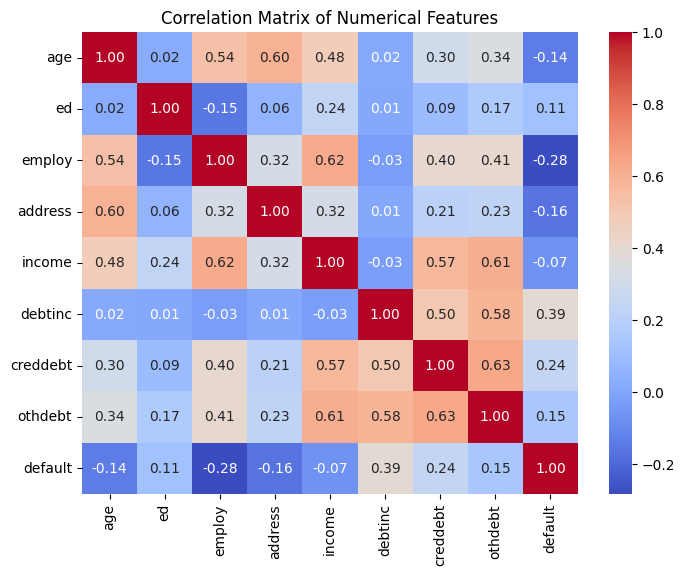

In [ ]:
# prompt: give a proper data visulalization for bankloan csv file

import matplotlib.pyplot as plt
import numpy as np
# Let's visualize the distribution of the 'default' column
plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=df)
plt.title('Distribution of Loan Default (0: No Default, 1: Default)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# Let's visualize the relationship between 'age' and 'income' based on 'default' status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', hue='default', data=df, alpha=0.5)
plt.title('Age vs. Income colored by Default Status')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Let's visualize the relationship between 'debtinc' and 'income' based on 'default' status
plt.figure(figsize=(8, 4))
sns.scatterplot(x='income', y='debtinc', hue='default', data=df, alpha=0.5)
plt.title('Income vs. Debt-to-Income Ratio colored by Default Status')
plt.xlabel('Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

# Let's visualize the distribution of 'age' for default and non-default cases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='default', multiple="stack", kde=True)
plt.title('Distribution of Age by Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Let's visualize the distribution of 'income' for default and non-default cases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='income', hue='default', multiple="stack", kde=True)
plt.title('Distribution of Income by Default Status')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Let's visualize the distribution of 'debtinc' for default and non-default cases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='debtinc', hue='default', multiple="stack", kde=True)
plt.title('Distribution of Debt-to-Income Ratio by Default Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Let's visualize the correlation matrix of the numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Training and Testing

In [ ]:
# Training and Testing

x=df.drop(['default'],axis=1)
y=df['default']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

# Create Model

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(xtest,ytest)

0.8

In [ ]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

np.float64(0.7857142857142857)

In [ ]:
# SVM

sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [ ]:
sv.score(xtest,ytest)

0.7928571428571428

In [ ]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [ ]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

<Axes: >

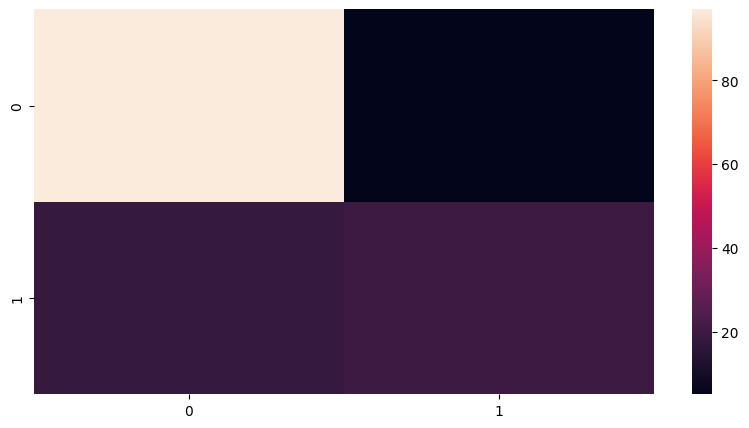

In [ ]:
yp = lr.predict(xtest)
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(10,5))
sns.heatmap(c,ax=ax)

#shows bar graph of people who can pay and those who cannot pay

<ipython-input-29-46352947>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, ax=ax, palette='pastel')


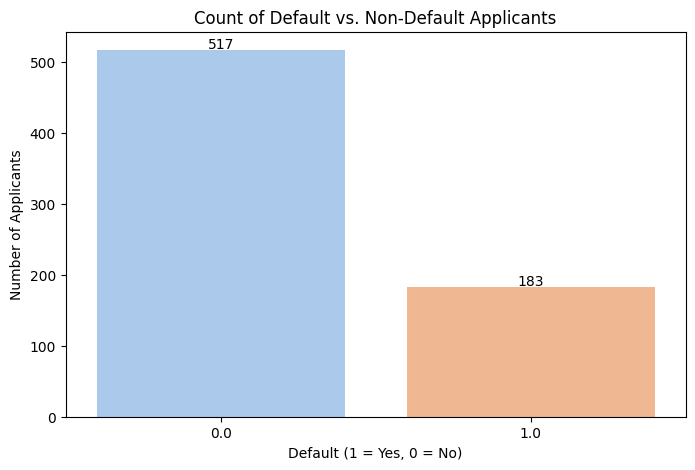

In [ ]:
# Assuming you've already cleaned your data and have df
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='default', data=df, ax=ax, palette='pastel')

# Add labels and title
ax.set_xlabel('Default (1 = Yes, 0 = No)')
ax.set_ylabel('Number of Applicants')
ax.set_title('Count of Default vs. Non-Default Applicants')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2,
            int(height), ha="center")

plt.show()

#Predicts whether the new applicant pays or not

In [ ]:

print("\n--- Let's Predict for ONE New Loan Applicant! ---")

new_person_info = pd.DataFrame({
    'age': [32],
    'ed': [3],
    'employ': [7],
    'address': [5],
    'income': [55],
    'debtinc': [18.0],
    'creddebt': [2.8],
    'othdebt': [1.2]
})

print("Here's the new person's info card:")
print(new_person_info)

scaled_new_person_info = sc.transform(new_person_info)

Model_guess = lr.predict(scaled_new_person_info)
how_sure_is_Model = lr.predict_proba(scaled_new_person_info)[:, 1]

print("\n--- Model's Guess ---")

if Model_guess[0] == 0:
    print("The Model guesses: This person will **PAY** their loan! (No Default)")
else:
    print("The Model guesses: This person will **NOT PAY** their loan! (Default)")

print(f"The Model is {how_sure_is_Model[0]*100:.2f}% sure this person will NOT PAY (Default).")
print(f"That means the Model is {(1 - how_sure_is_Model[0])*100:.2f}% sure this person WILL PAY.")




--- Let's Predict for ONE New Loan Applicant! ---
Here's the new person's info card:
   age  ed  employ  address  income  debtinc  creddebt  othdebt
0   32   3       7        5      55     18.0       2.8      1.2

--- Model's Guess ---
The Model guesses: This person will **PAY** their loan! (No Default)
The Model is 45.84% sure this person will NOT PAY (Default).
That means the Model is 54.16% sure this person WILL PAY.


# Bargraph of default and not default people of particular age

<ipython-input-31-1928851042>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='default', palette='Set2')


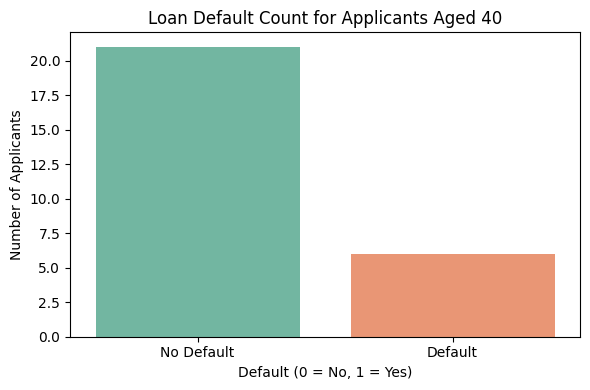

In [ ]:
# After reading in and cleaning your data:
df = pd.read_csv('bankloans.csv')
df = df.dropna()

# Filter by age—for example, keep only applicants aged 40
age_to_find = 40
df_filtered = df[df['age'] == age_to_find]

# print(df_filtered.head())  # See the first few matching applicants

plt.figure(figsize=(6, 4))
sns.countplot(data=df_filtered, x='default', palette='Set2')

plt.title(f"Loan Default Count for Applicants Aged {age_to_find}")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Number of Applicants")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.tight_layout()
plt.show()

In [ ]:
# prompt: i want Accuracy
# Precision
# Recall
# F1-Score
# Specificity
# ROC-AUC
# Geometric Mean
# Log Loss
# Error Rate and
# Kappa
# of RandomForestClassifier and do the model is trainning and testing to increase the accuracy

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score
from sklearn.metrics import confusion_matrix

# Train the RandomForestClassifier model again
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(xtrain, ytrain)
ypred_rfc = rfc.predict(xtest)
y_pred_proba_rfc = rfc.predict_proba(xtest)[:, 1]

# Calculate metrics
accuracy = accuracy_score(ytest, ypred_rfc)
precision = precision_score(ytest, ypred_rfc)
recall = recall_score(ytest, ypred_rfc)
f1 = f1_score(ytest, ypred_rfc)

# Specificity
tn, fp, fn, tp = confusion_matrix(ytest, ypred_rfc).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# ROC-AUC
roc_auc = roc_auc_score(ytest, y_pred_proba_rfc)

# Geometric Mean
# Need to handle potential zero values in sensitivity (recall) or specificity
if recall > 0 and specificity > 0:
    geometric_mean = np.sqrt(recall * specificity)
else:
    geometric_mean = 0.0

# Log Loss
logloss = log_loss(ytest, y_pred_proba_rfc)

# Error Rate
error_rate = 1 - accuracy

# Kappa
kappa = cohen_kappa_score(ytest, ypred_rfc)


print("--- RandomForestClassifier Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Kappa: {kappa:.4f}")

# To increase accuracy, you could explore:
# 1. Hyperparameter Tuning for RandomForestClassifier (e.g., using GridSearchCV)
# 2. Feature Engineering
# 3. Trying other models and comparing performance
# 4. Handling imbalanced data if present


--- RandomForestClassifier Metrics ---
Accuracy: 0.8071
Precision: 0.7391
Recall (Sensitivity): 0.4474
F1-Score: 0.5574
Specificity: 0.9412
ROC-AUC: 0.8358
Geometric Mean: 0.6489
Log Loss: 0.4344
Error Rate: 0.1929
Kappa: 0.4435
